In [53]:
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline


In [4]:
df = pd.read_csv("../data/qf_data.csv", index_col=0, parse_dates=True)

In [7]:
print(df.shape)
print(df.columns)
df.head()

(3484, 6)
Index(['EEM', 'Gold', 'FTSE100', 'S&P500', 'Nikkei225', 'UST10Y'], dtype='object')


,EEM,Gold,FTSE100,S&P500,Nikkei225,UST10Y
Date,,,,,,
2010-01-04,30.785858,109.800003,5500.299805,1132.989990,10654.790039,3.841
2010-01-05,31.009306,109.699997,5522.500000,1136.520020,10681.830078,3.755
2010-01-06,31.074186,111.510002,5530.000000,1137.140015,10731.450195,3.808
2010-01-07,30.893974,110.820000,5526.700195,1141.689941,10681.660156,3.822
2010-01-08,31.139063,111.370003,5534.200195,1144.979980,10798.320312,3.808


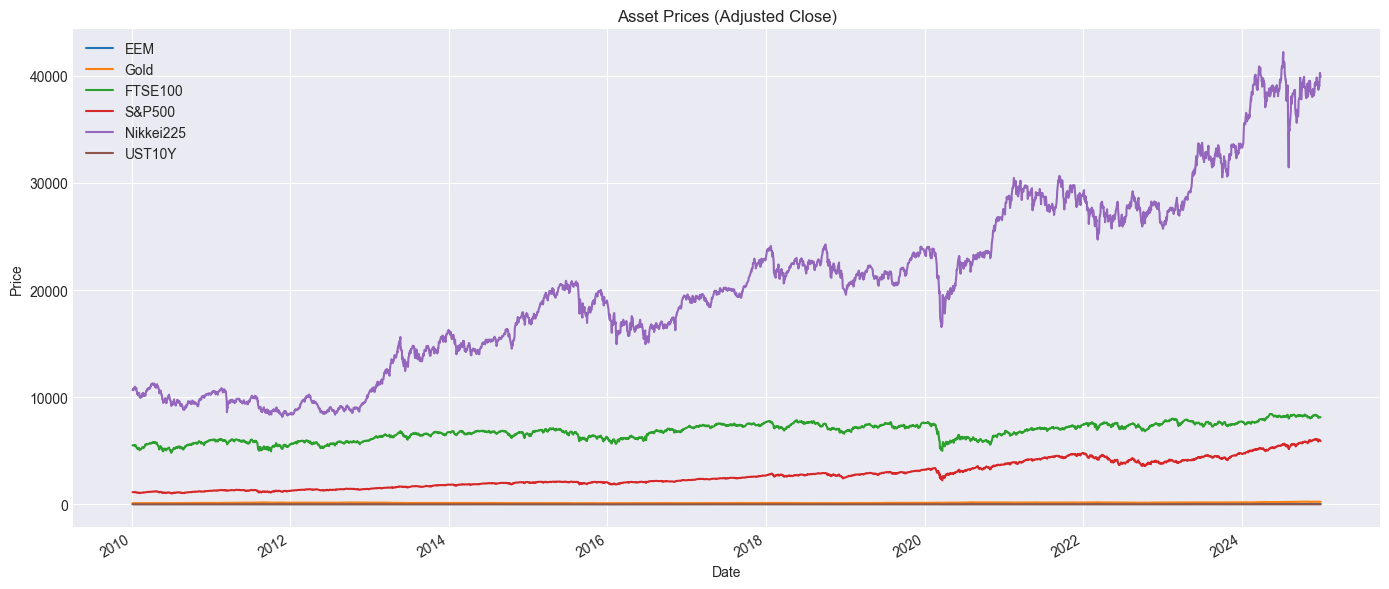

In [8]:

fig, ax = plt.subplots(figsize=(14, 6))

df.plot(
    ax=ax,  # Specify the axes to plot on
    title="Asset Prices (Adjusted Close)",
    lw=1.5
)


ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')

# Finalize and show the plot
plt.tight_layout()
plt.show()


In the above plot we see the trends of each of the asset prices Adjusted to close of the day and we see that 

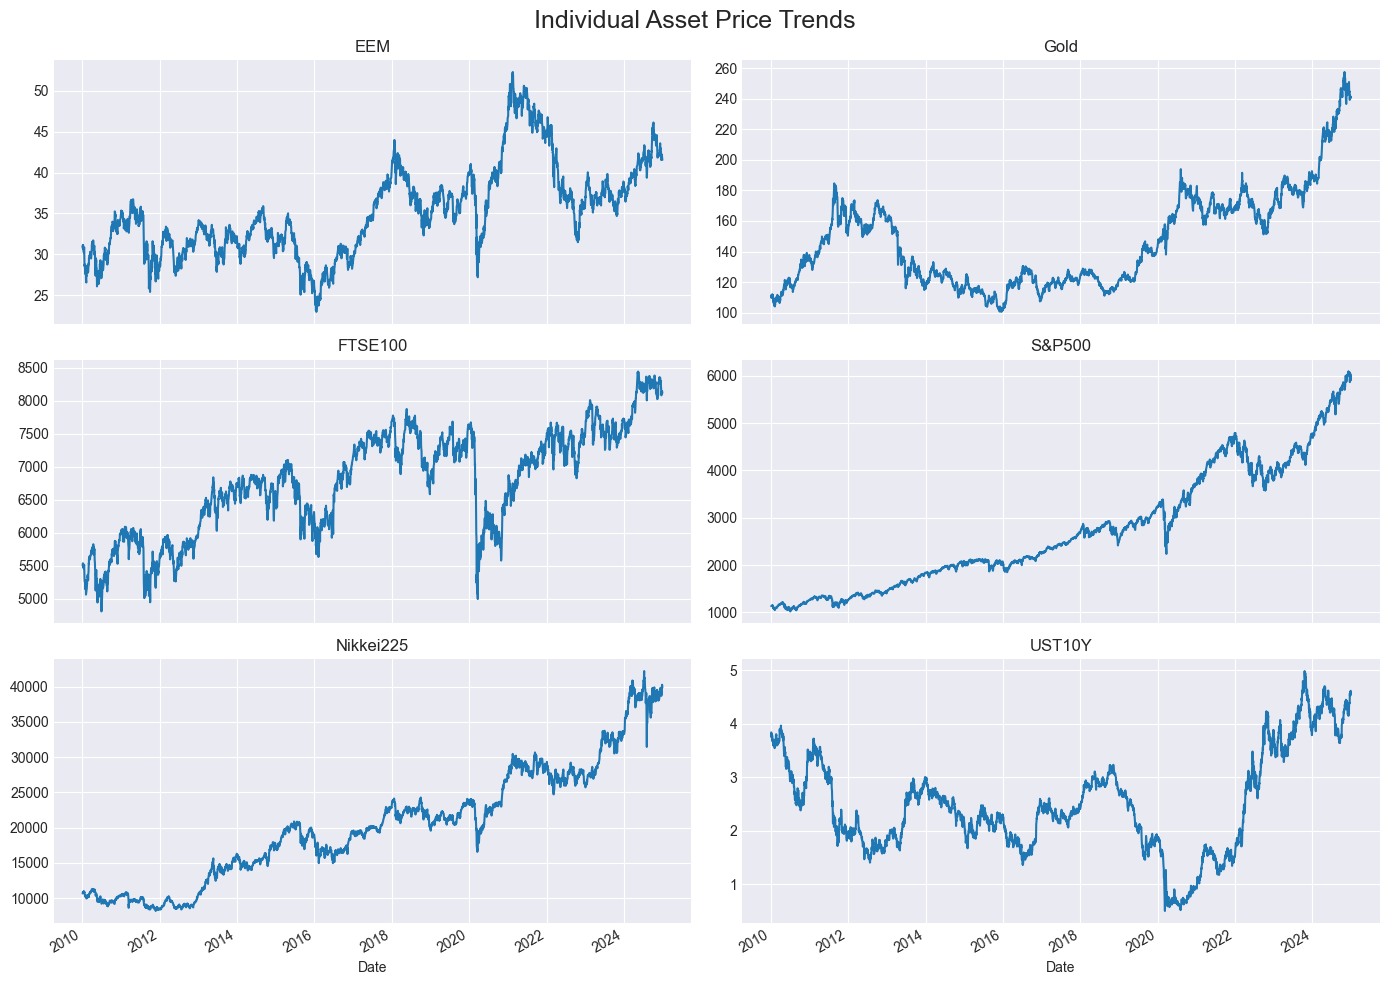

In [17]:



fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, col in enumerate(df.columns):
    df[col].plot(ax=axes[i], lw=1.5, grid=True)
    axes[i].set_title(col) 
    
plt.suptitle("Individual Asset Price Trends", fontsize=18)
plt.tight_layout()
plt.subplots_adjust(top=0.93)  
plt.show()


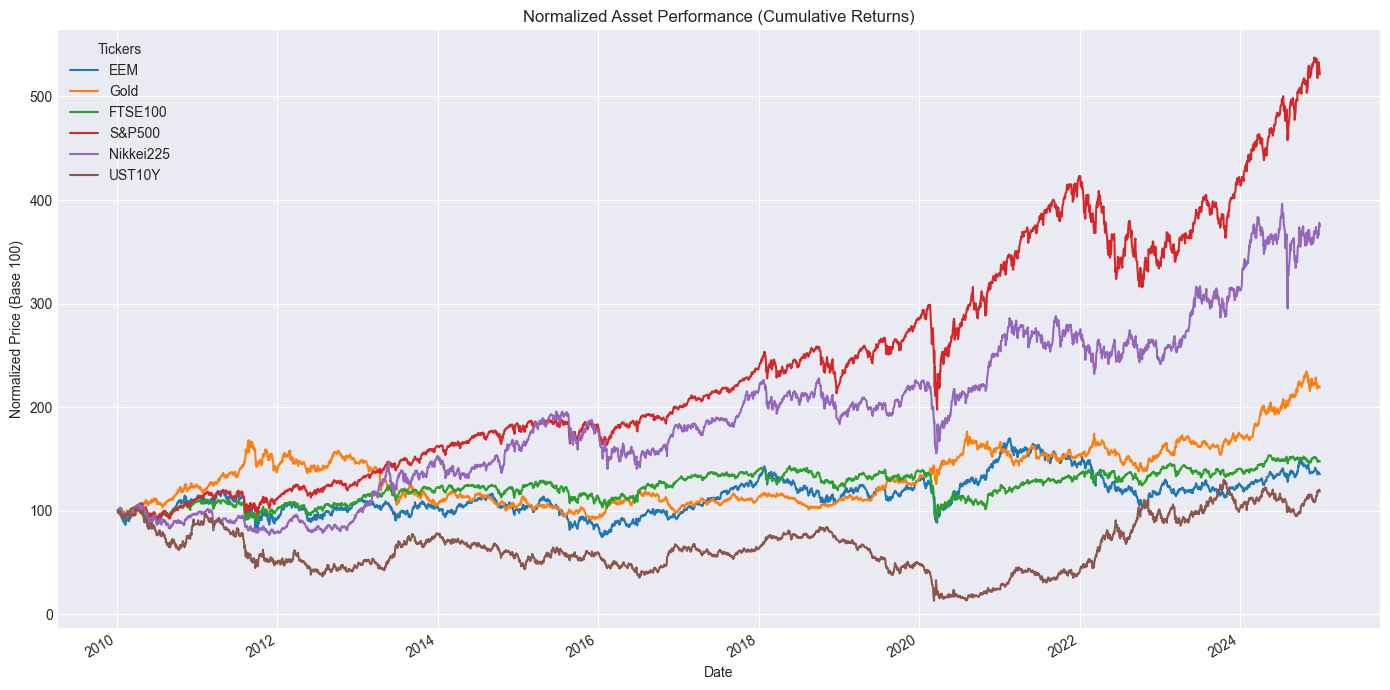

In [11]:
normalized_df = (df / df.iloc[0]) * 100


fig, ax = plt.subplots(figsize=(14, 7))
normalized_df.plot(
    ax=ax,
    title="Normalized Asset Performance (Cumulative Returns)",
    lw=1.5
)

ax.set_ylabel("Normalized Price (Base 100)")
ax.set_xlabel("Date")
ax.legend(title="Tickers", loc='upper left')

plt.tight_layout()
plt.show()


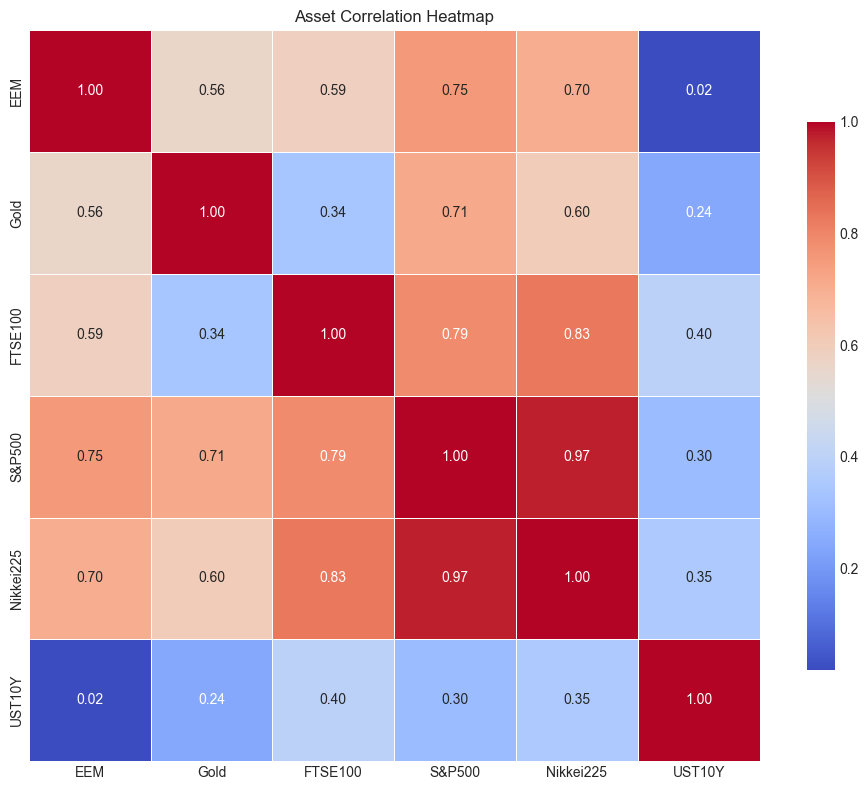

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (no change here)
corr_matrix = df.corr()


fig, ax = plt.subplots(figsize=(10, 8))


sns.heatmap(
    corr_matrix,
    ax=ax,  
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}
)

ax.set_title("Asset Correlation Heatmap")

plt.tight_layout()
plt.show()


In [20]:
In the following code blocks we will see the log returns of each of the tickers 

SyntaxError: invalid syntax (3720262047.py, line 1)

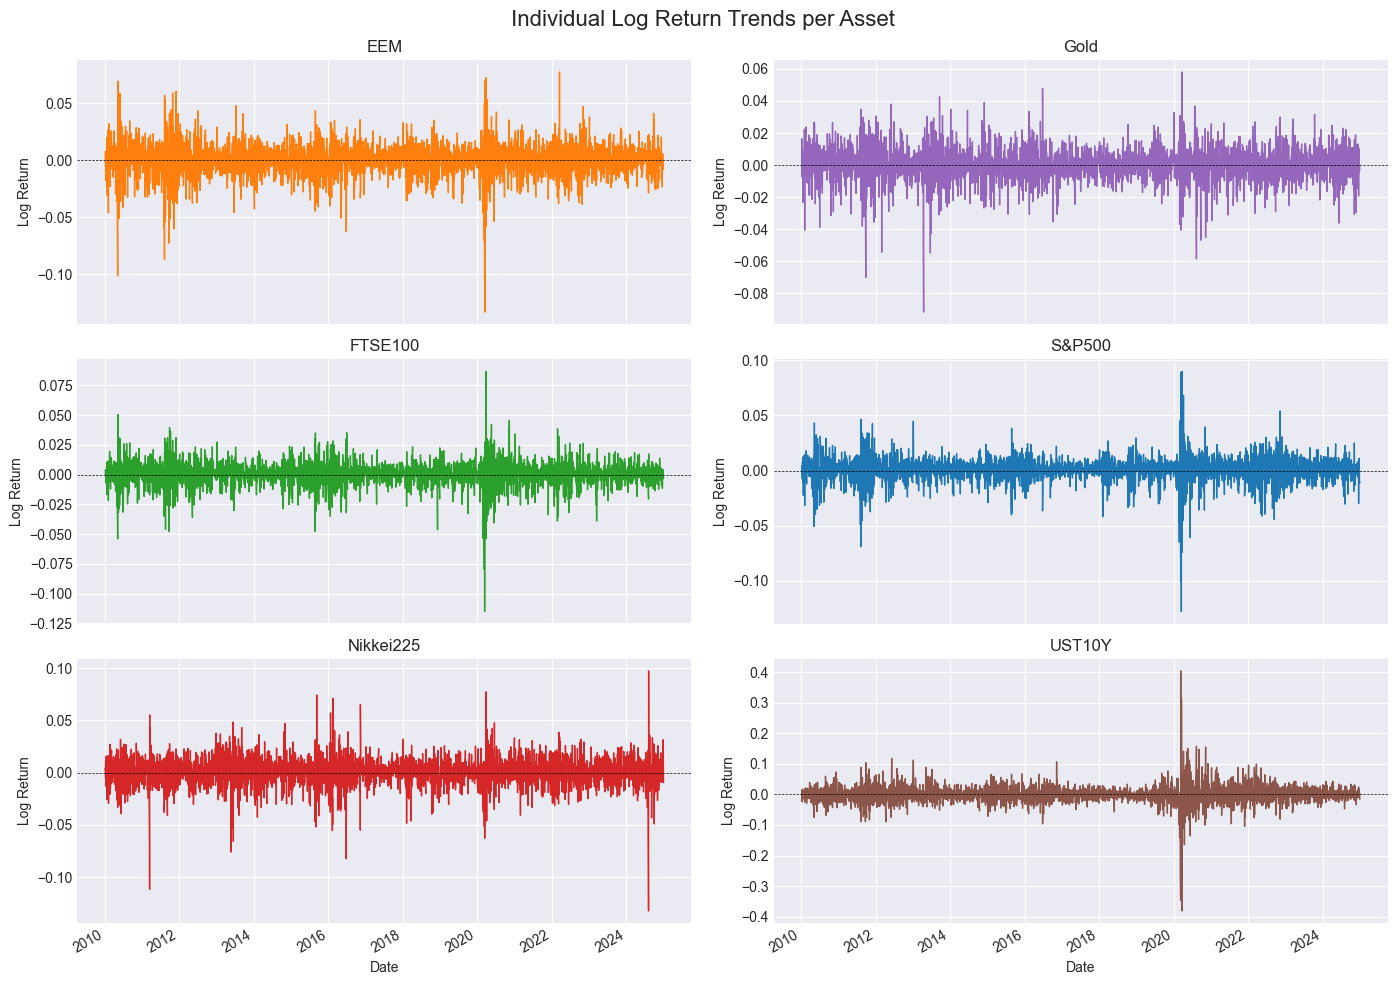

In [25]:

# Compute daily log returns
log_returns = np.log(df / df.shift(1)).dropna()
log_returns.head()

custom_colors = {
    'S&P500': 'tab:blue',
    'FTSE100': 'tab:green',
    'Nikkei225': 'tab:red',
    'EEM': 'tab:orange',
    'Gold': 'tab:purple',
    'UST10Y': 'tab:brown'
}

fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()

for i, ticker in enumerate(log_returns.columns):
    log_returns[ticker].plot(
        ax=axes[i],
        lw=1,
        color=custom_colors.get(ticker, 'tab:gray'),  # fallback if color missing
        grid=True
    )
    axes[i].set_title(f"{ticker}")
    axes[i].set_ylabel("Log Return")
    axes[i].axhline(0, color='black', lw=0.5, linestyle='--')

plt.suptitle("Individual Log Return", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()




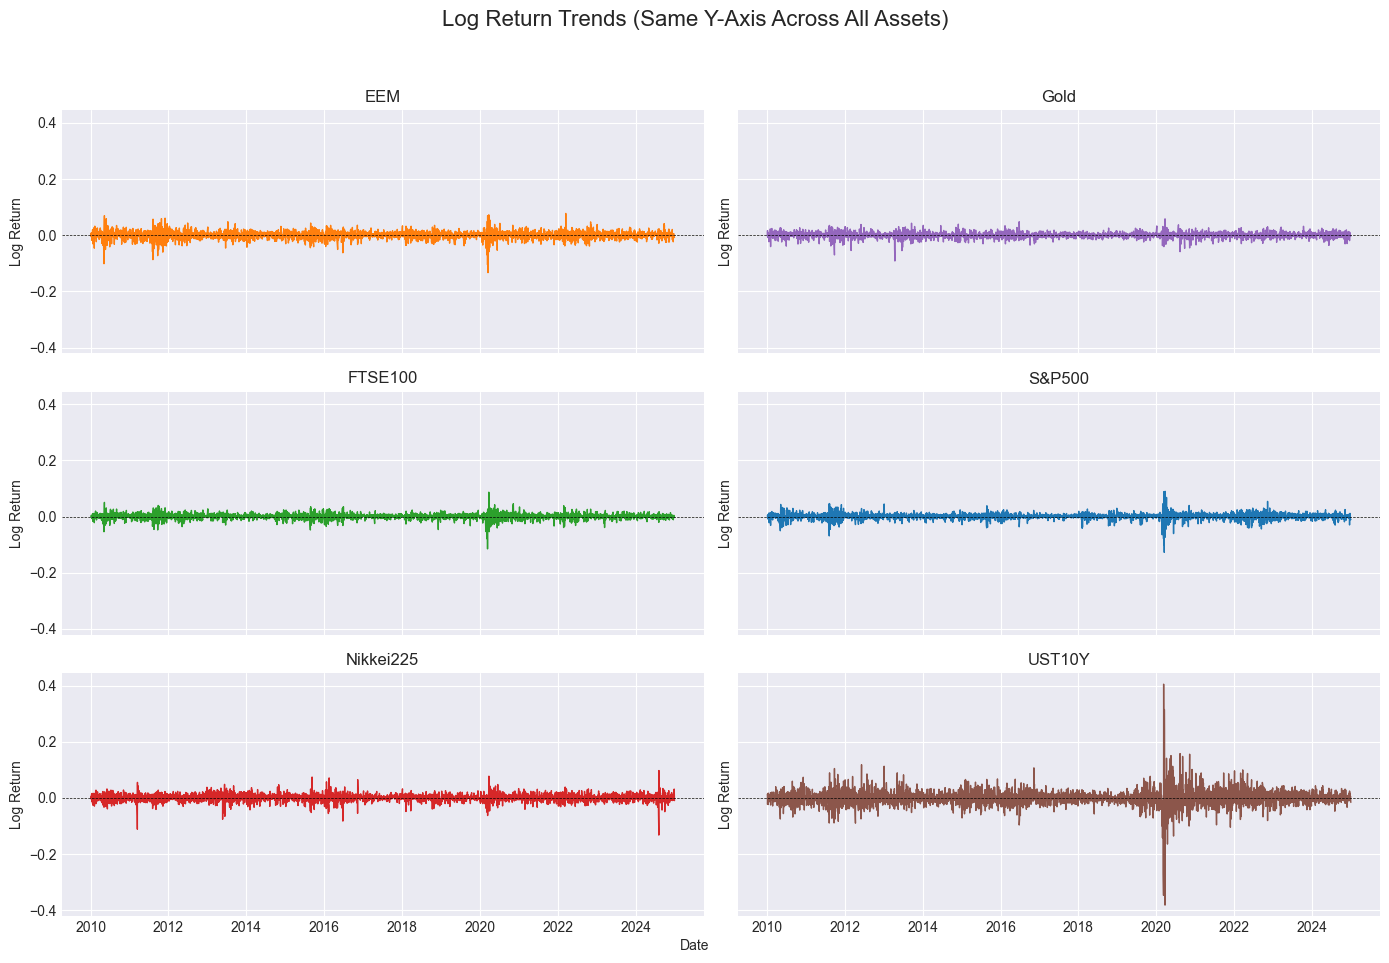

In [27]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)  # sharey=True is the key
axes = axes.flatten()

custom_colors = {
    'S&P500': 'tab:blue',
    'FTSE100': 'tab:green',
    'Nikkei225': 'tab:red',
    'EEM': 'tab:orange',
    'Gold': 'tab:purple',
    'UST10Y': 'tab:brown'
}

for i, ticker in enumerate(log_returns.columns):
    ax = axes[i]
    ax.plot(log_returns.index, log_returns[ticker], color=custom_colors[ticker], lw=1)
    ax.axhline(0, color='black', lw=0.5, linestyle='--')
    ax.set_title(f"{ticker}")
    ax.set_ylabel("Log Return")
    ax.grid(True)

fig.text(0.5, 0.04, 'Date', ha='center')
fig.suptitle("Log Return Trends (Same Y-Axis Across All Assets)", fontsize=16)
plt.tight_layout(rect=[0, 0.04, 1, 0.95])
plt.show()


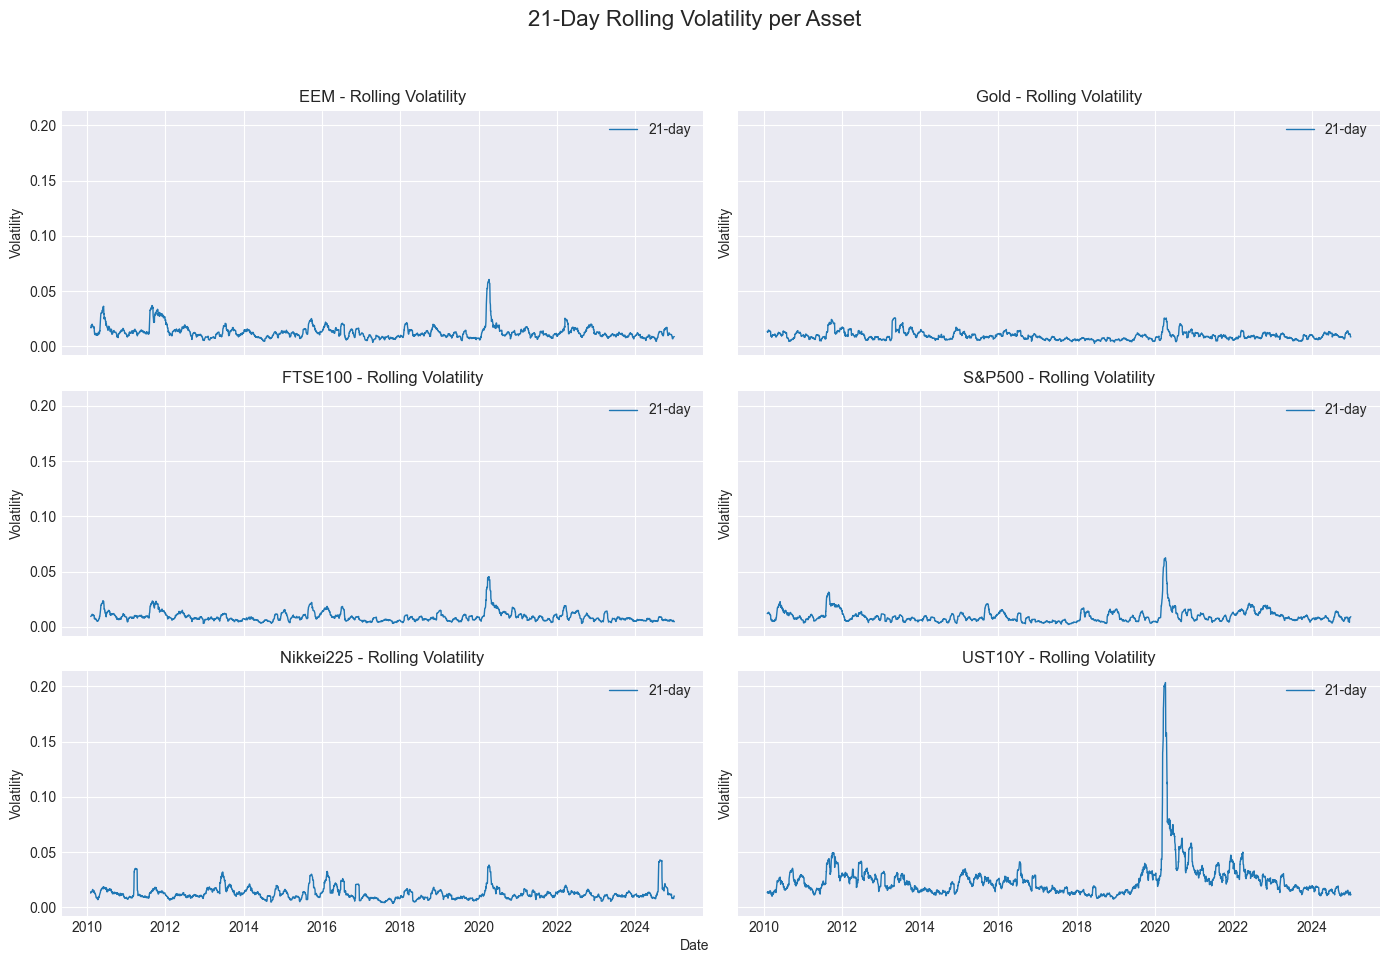

In [31]:


# Compute rolling volatilities
rolling_vol_21 = log_returns.rolling(window=21).std()


# Plot for each asset separately
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, ticker in enumerate(log_returns.columns):
    ax = axes[i]
    ax.plot(rolling_vol_21.index, rolling_vol_21[ticker], label="21-day", color="tab:blue", lw=1)
   
    ax.set_title(f"{ticker} - Rolling Volatility")
    ax.set_ylabel("Volatility")
    ax.grid(True)
    ax.legend()

fig.text(0.5, 0.04, 'Date', ha='center')
fig.suptitle("21-Day Rolling Volatility per Asset", fontsize=16)
plt.tight_layout(rect=[0, 0.04, 1, 0.95])
plt.show()





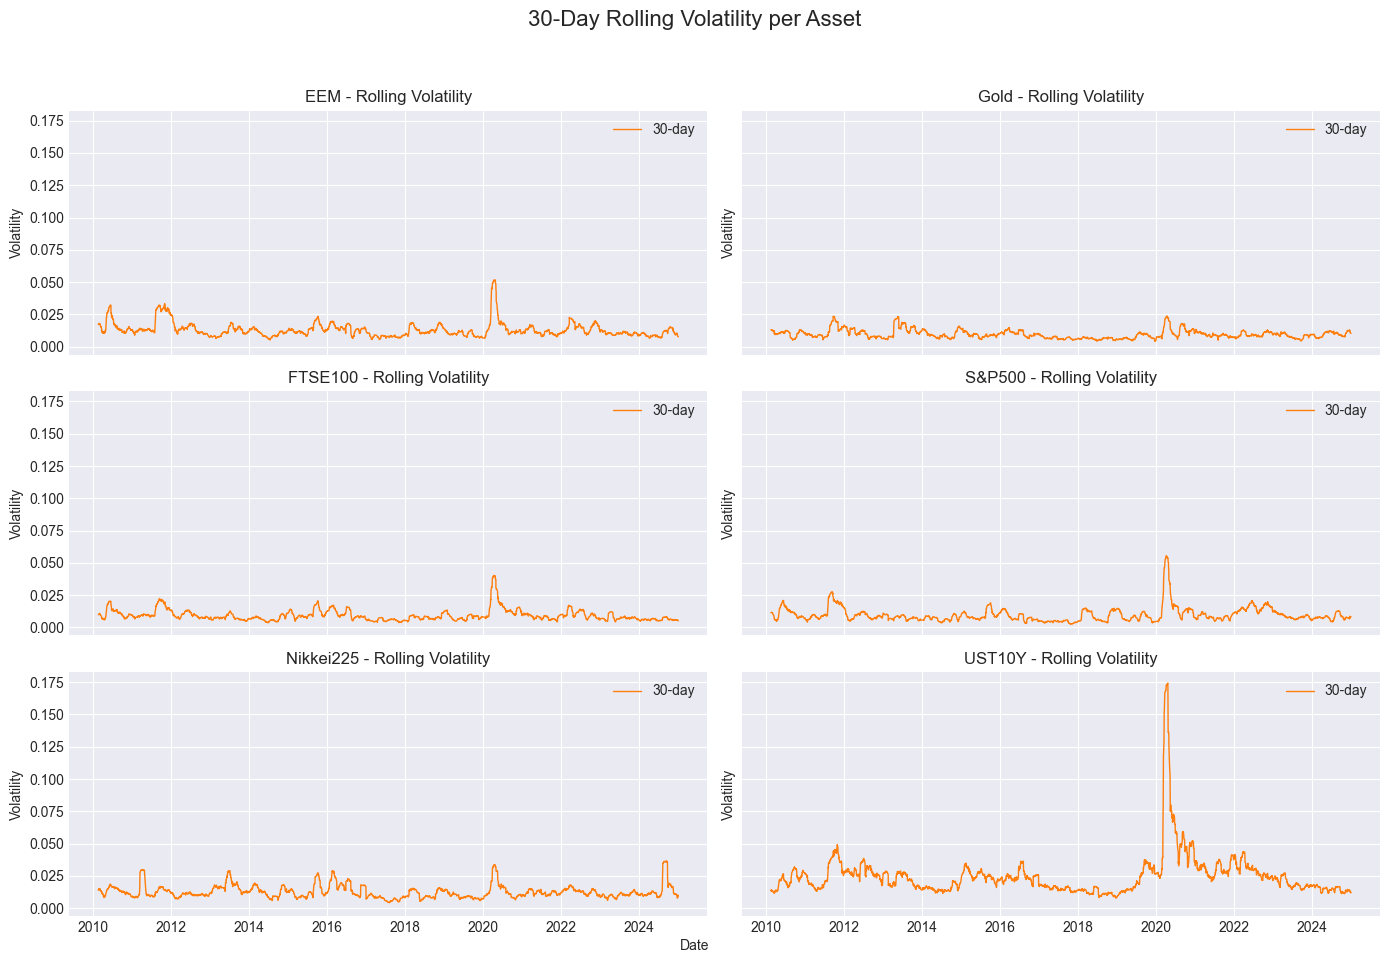

In [32]:

rolling_vol_30 = log_returns.rolling(window=30).std()

# Plot for each asset separately
fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, ticker in enumerate(log_returns.columns):
    ax = axes[i]
    ax.plot(rolling_vol_30.index, rolling_vol_30[ticker], label="30-day", color="tab:orange", lw=1)
    ax.set_title(f"{ticker} - Rolling Volatility")
    ax.set_ylabel("Volatility")
    ax.grid(True)
    ax.legend()

fig.text(0.5, 0.04, 'Date', ha='center')
fig.suptitle("30-Day Rolling Volatility per Asset", fontsize=16)
plt.tight_layout(rect=[0, 0.04, 1, 0.95])
plt.show()


### 21-Day Rolling Volatility'

UST10Y shows significant volatility spikes, especially around Covid 19 in 2020.
Gold as usual remains the most stable asset, reinforcing its role as a hedge.
EEM and Nikkei225 show more short-term fluctuations, indicating regional/global risk exposure.
Volatility clustering observed across assets — relevant for modeling temporal dependencies.

### 30-Day Rolling Volatility

Offers smoother, longer-term view of market behavior.
Trends are very similar to 21-day results but are less noisy.
Covid-19 remains the most common and prominent spike in all assents .
Differences in volatility persistence across assets are clearer most for UST10Y which has stays longer .


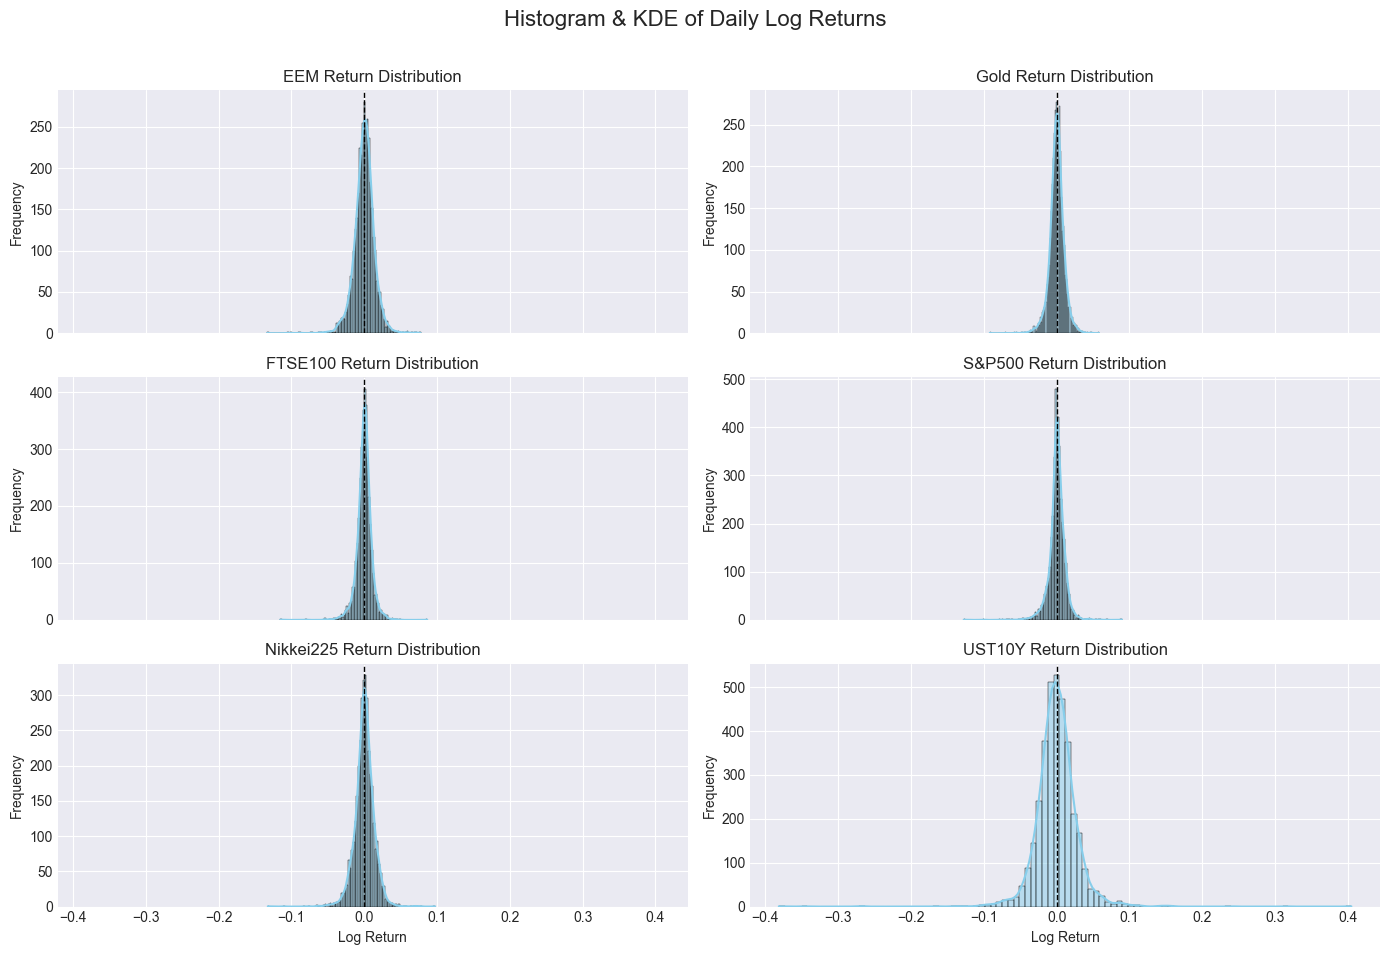

In [34]:


fig, axes = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
axes = axes.flatten()  

for i, ticker in enumerate(log_returns.columns):
    ax = axes[i]  
    sns.histplot(log_returns[ticker], bins=100, kde=True, color='skyblue', ax=ax)
    ax.axvline(0, color='black', linestyle='--', lw=1)
    ax.set_title(f"{ticker} Return Distribution")
    ax.set_xlabel("Log Return")
    ax.set_ylabel("Frequency")


fig.suptitle("Histogram & KDE of Daily Log Returns", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()


###  Some Insights from the above distribution. 

## All assets show return distributions **centered around zero**, indicating no strong directional bias in daily returns.
## Distributions are **leptokurtic** (sharp peak, fat tails), which suggests higher probability of extreme events compared to a normal distribution.
## UST10Y and EEM exhibit **wider spreads**, implying greater daily return variability (higher risk).
## Most assets show **slight negative skew**, hinting at more frequent downside shocks.

## These characteristics validate the need for models that can handle **non-Gaussian, fat-tailed distributions**, like LSTM or Transformer-based methods.


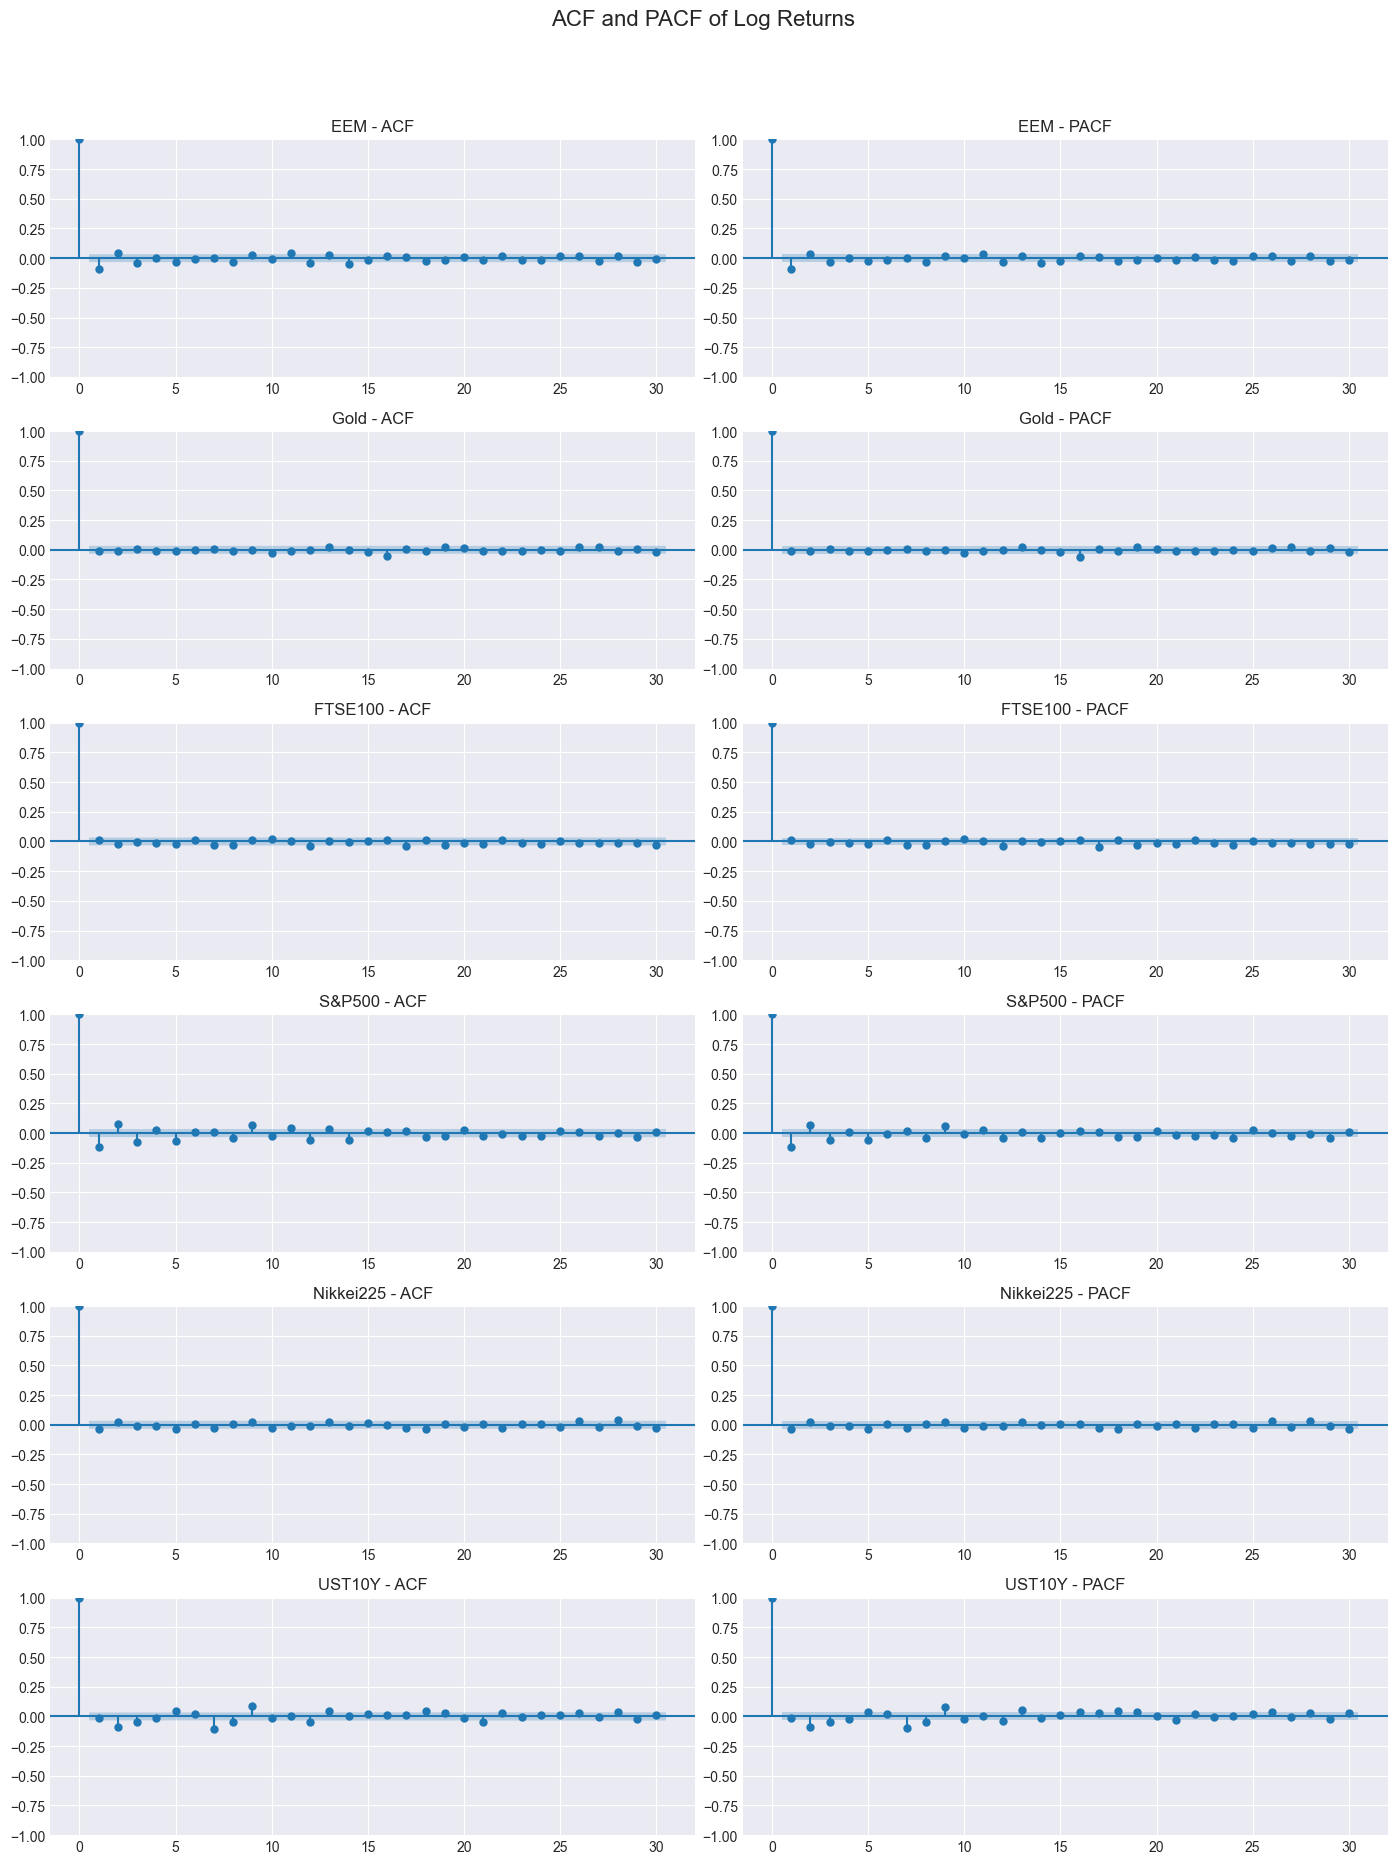

In [54]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

max_lag = 30

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(14, 20))
fig.suptitle("ACF and PACF of Log Returns", fontsize=16)

for i, ticker in enumerate(log_returns.columns):
    
    plot_acf(log_returns[ticker].dropna(), lags=max_lag, ax=axes[i, 0], title=f"{ticker} - ACF") #ACF
    plot_pacf(log_returns[ticker].dropna(), lags=max_lag, ax=axes[i, 1], title=f"{ticker} - PACF") #PACF

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()



###Comments
The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) were plotted for each asset.
Both ACF and PACF show a strong spike at lag 0 (self-correlation), but minimal or no significant spikes at other lags.
This indicates that daily log returns exhibit weak or no autocorrelation — implying near-randomness or white noise behavior.
The similarity between ACF and PACF suggests that returns have little linear dependence on previous days, even after accounting for intermediate lags.
This insight justifies the use of more complex temporal models (like Transformers or LSTMs) which can potentially detect nonlinear or higher-order dependencies beyond basic autocorrelation.


## Features For the next model

In [62]:
#Already used this for plotting but this helps in removing scaling issues helps in return prediction and also reduces variance
log_returns = np.log(df/df.shift(1))
log_returns = log_returns.dropna()  


log_returns.head()

,EEM,Gold,FTSE100,S&P500,Nikkei225,UST10Y
Date,,,,,,
2010-01-05,0.007232,-0.000911,0.004028,0.003111,0.002535,-0.022644
2010-01-06,0.002090,0.016365,0.001357,0.000545,0.004635,0.014016
2010-01-07,-0.005816,-0.006207,-0.000597,0.003993,-0.004650,0.003670
2010-01-08,0.007902,0.004951,0.001356,0.002878,0.010862,-0.003670
2010-01-12,-0.018221,-0.007933,-0.006435,-0.007680,0.007457,-0.023649


In [60]:
#Rolling Volatility - Standard deviation of returns in the last 30 days. Gives us an idea about uncertainity of the market. 

rolling_vol_30d = log_returns.rolling(window=30).std()

rolling_vol_30d.tail()



,EEM,Gold,FTSE100,S&P500,Nikkei225,UST10Y
Date,,,,,,
2024-12-20,0.009387,0.011475,0.005950,0.007501,0.007828,0.012645
2024-12-23,0.008429,0.011445,0.005759,0.007593,0.008126,0.012804
2024-12-24,0.008368,0.010612,0.005686,0.007858,0.008140,0.012821
2024-12-27,0.007746,0.010488,0.005189,0.008128,0.009962,0.011856
2024-12-30,0.007796,0.010327,0.005241,0.008359,0.009609,0.012263


In [61]:
#Z-score helps in comparing returns across assets and gives an idea about volatility especially post covid 
mean_21d = log_returns.rolling(window=21).mean()
std_21d = log_returns.rolling(window=21).std()

#Zscore
zscore_return_21d = (log_returns - mean_21d) / std_21d
zscore_return_21d.tail()


,EEM,Gold,FTSE100,S&P500,Nikkei225,UST10Y
Date,,,,,,
2024-12-20,0.525406,0.957204,-0.431792,1.294997,-0.411473,-0.847881
2024-12-23,0.667468,-0.321746,0.443366,0.846913,1.277325,1.064560
2024-12-24,0.345691,0.335744,1.032249,1.206584,-0.507300,-0.266316
2024-12-27,-0.876985,0.005439,0.506560,-1.264945,2.898309,0.205738
2024-12-30,-0.850866,-0.317529,-0.581595,-1.071538,-1.113232,-1.583635


In [63]:
#Compute SMA-5 
sma_5 = df.rolling(window=5).mean()


sma_5.tail()


,EEM,Gold,FTSE100,S&P500,Nikkei225,UST10Y
Date,,,,,,
2024-12-20,42.063113,241.956003,8169.259863,5958.956055,39083.871094,4.4740
2024-12-23,41.953574,241.172003,8137.379980,5938.954004,39024.641406,4.5144
2024-12-24,41.890188,240.672003,8125.739941,5936.840039,38959.075781,4.5556
2024-12-27,41.957536,241.100003,8115.879980,5956.575977,39198.965625,4.5806
2024-12-30,41.929804,241.306003,8119.020020,5964.547949,39415.157813,4.5756


In [64]:
# Short and long EMAs
ema_short = df.ewm(span=12, adjust=False).mean()
ema_long = df.ewm(span=26, adjust=False).mean()

# MACD is the difference between the two
macd = ema_short - ema_long
macd.tail()



,EEM,Gold,FTSE100,S&P500,Nikkei225,UST10Y
Date,,,,,,
2024-12-20,-0.230685,-0.815841,-13.827205,7.202217,101.472648,0.061616
2024-12-23,-0.231512,-0.951735,-21.769285,5.620645,99.131263,0.073320
2024-12-24,-0.219251,-1.009068,-25.007463,9.580051,86.236454,0.081017
2024-12-27,-0.234009,-1.045680,-26.238444,7.052731,174.412016,0.088357
2024-12-30,-0.269767,-1.123871,-29.201295,-0.105164,210.666264,0.087198


In [72]:
# Create an empty flag series with the same index as your price data
covid_flag = pd.Series(0, index=df.index)


covid_flag.loc["2020-02-15":"2020-06-30"] = 1
covid_flag[covid_flag == 1].head()


Date
2020-02-18    1
2020-02-19    1
2020-02-20    1
2020-02-21    1
2020-02-25    1
dtype: int64

In [69]:
# 30-day volatility we already computed
vol_30d = log_returns.rolling(window=30).std()

median_vol = vol_30d.median()

# Flag for when volatility spikes 2× median
vol_spike_flag = (vol_30d > 2 * median_vol).astype(int)

vol_spike_flag.head()


,EEM,Gold,FTSE100,S&P500,Nikkei225,UST10Y
Date,,,,,,
2010-01-05,0,0,0,0,0,0
2010-01-06,0,0,0,0,0,0
2010-01-07,0,0,0,0,0,0
2010-01-08,0,0,0,0,0,0
2010-01-12,0,0,0,0,0,0


In [77]:



#Renaming to avoid confusion 
log_ret_df     = log_returns.add_suffix('_log_ret')
vol_30d_df     = rolling_vol_30d.add_suffix('_vol_30d')
zscore_df      = zscore_return_21d.add_suffix('_zscore')
sma5_df        = sma_5.add_suffix('_sma5')
macd_df        = macd.add_suffix('_macd')
vol_flag_df    = vol_spike_flag.add_suffix('_vol_spike')

# Concatanate 
features_df = pd.concat([
    log_ret_df,
    vol_30d_df,
    zscore_df,
    sma5_df,
    macd_df,
    vol_flag_df
], axis=1)


features_df['covid_flag'] = covid_flag
features_df.dropna(inplace=True)

features_df.to_csv("../data/final_features.csv")
features_df.head()
features_df.shape
features_df.columns

Index(['EEM_log_ret', 'Gold_log_ret', 'FTSE100_log_ret', 'S&P500_log_ret',
       'Nikkei225_log_ret', 'UST10Y_log_ret', 'EEM_vol_30d', 'Gold_vol_30d',
       'FTSE100_vol_30d', 'S&P500_vol_30d', 'Nikkei225_vol_30d',
       'UST10Y_vol_30d', 'EEM_zscore', 'Gold_zscore', 'FTSE100_zscore',
       'S&P500_zscore', 'Nikkei225_zscore', 'UST10Y_zscore', 'EEM_sma5',
       'Gold_sma5', 'FTSE100_sma5', 'S&P500_sma5', 'Nikkei225_sma5',
       'UST10Y_sma5', 'EEM_macd', 'Gold_macd', 'FTSE100_macd', 'S&P500_macd',
       'Nikkei225_macd', 'UST10Y_macd', 'EEM_vol_spike', 'Gold_vol_spike',
       'FTSE100_vol_spike', 'S&P500_vol_spike', 'Nikkei225_vol_spike',
       'UST10Y_vol_spike', 'covid_flag'],
      dtype='object')

In [82]:
# 5-day ahead returns for all assets
target_returns_5d = log_returns.shift(-5).add_suffix('_target_5d')

final_features = features_df.join(target_returns_5d, how='inner')

X = final_features[features_df.columns]
y = final_features[target_returns_5d.columns]

print(X.shape)
print(X.index.equals(y.index))

final_features.to_csv("../data/final_features_with_targets.csv")

(3454, 37)
True


### Feature Engineering reasoning
A mix of original features from the paper (e.g., log returns, volatility, z-score) and additional post-COVID features (e.g., volatility spike flag, COVID flag, SMA(5), MACD) was created

The added features address market behaviors not captured during the pre-COVID period used in the paper, making the model more robust to real-world volatility and regime shifts.

Each feature captures specific signals:


vol_spike_flag: detects sudden volatility surges — useful for models to adjust predictions during regime shifts.

covid_flag: adds macro-level event context — especially valuable for models like LSTM or Transformers that model sequences over time.

SMA_5, MACD: introduce technical trend-following signals — useful for both classical ML (XGBoost, MLP) and sequential DL models.

These additional features complement the original features and are especially helpful for:

XGBoost/MLP: Handle tabular features well — benefit from more diverse handcrafted signals.

LSTM/Transformer: Temporal models — benefit from regime indicators and momentum features that show evolving market structure.